In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import sqlite3 as sql

In [103]:
plt.rc('font',family="AppleGothic")# 맥
plt.rcParams['axes.unicode_minus'] = False

### 화재통계 테이블의 애트리뷰트 이름 가져오기

In [89]:
conn = sql.connect('./data_analysis.db',isolation_level=None)

conn.row_factory = sql.Row

c = conn.cursor()

c.execute('SELECT * FROM 화재통계')

r = c.fetchone()

key = r.keys()

### 화재통계 테이블의 데이터 가져오기

In [90]:
c = conn.cursor()

c.execute("SELECT * FROM 화재통계")

rows = c.fetchall()

data = pd.DataFrame(data=rows,columns=r.keys())

### DB 연결(세션) 종료

In [91]:
conn.close

<function Connection.close>

### 화재통계 데이터 일부 보기

In [147]:
data.head()

,연번,사망,부상,인명피해(명)소계,재산피해소계,시도,시군구,읍면동,발화열원,발화열원소분류,발화요인대분류,발화요인소분류,최초착화물대분류,최초착화물소분류,장소대분류,장소중분류,장소소분류,지번동
0,1,0,0,0,2920,경상남도,합천군,청덕면,작동기기,전기적 아크(단락),전기적 요인,접촉불량에 의한 단락,"전기,전자",전선피복,주거,단독주택,단독주택,청덕면
1,2,0,0,0,0,서울특별시,영등포구,여의도동,"담뱃불, 라이터불",담뱃불,부주의,담배꽁초,기타,기타,임야,들불,기타 들불,여의도동
2,3,0,0,0,137,서울특별시,강남구,논현동,"담뱃불, 라이터불",담뱃불,부주의,담배꽁초,"침구,직물류","기타(침구,직물류)","자동차,철도차량",자동차,오토바이,논현1동
3,4,0,0,0,326,서울특별시,도봉구,쌍문동,"담뱃불, 라이터불",담뱃불,부주의,담배꽁초,"종이,목재,건초등","기타(종이,목재,건초등)","판매,업무시설",일반업무,일반빌딩,쌍문2동
4,5,0,0,0,0,부산광역시,연제구,연산동,작동기기,"기기 전도,복사열",부주의,음식물 조리중,식품,음식물,주거,공동주택,다세대주택,연산9동


In [139]:
city = data[['시도']]

### 오름차순으로 정렬

In [142]:
sort_city_column =city['시도'].value_counts().index

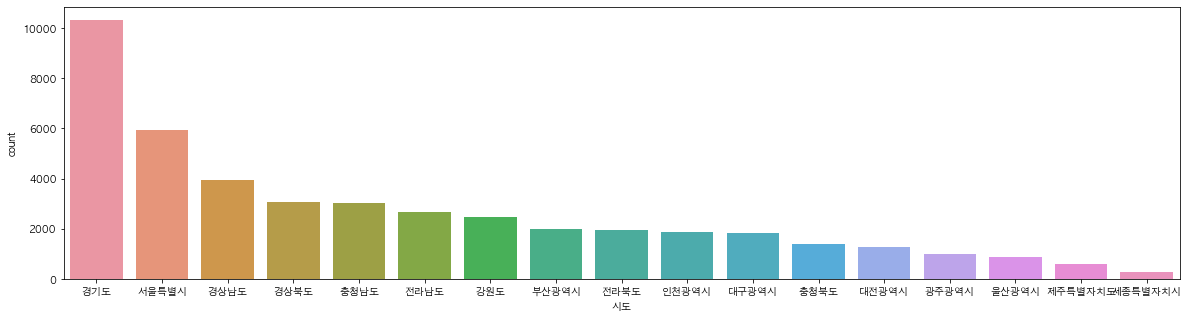

In [143]:
plt.figure(figsize=(20,5))
sns.countplot(data=city,x='시도',order=sort_city_column)

In [395]:
sort_city_column

Index(['경기도', '서울특별시', '경상남도', '경상북도', '충청남도', '전라남도', '강원도', '부산광역시', '전라북도',
       '인천광역시', '대구광역시', '충청북도', '대전광역시', '광주광역시', '울산광역시', '제주특별자치도',
       '세종특별자치시'],
      dtype='object')

In [567]:
def area_injury_count(area,rename=None,sum=False):
    select_area = data[data['시도']==area]
    select_area = select_area.dropna()
    if sum:
        area_injury= select_area[['장소대분류','부상']].groupby('장소대분류').sum()
    else:
        area_injury= select_area[['장소대분류','부상']].groupby('장소대분류').count()
    area_injury = area_injury.drop(['기타','기타서비스'])
    area_injury = area_injury.sort_values('부상',ascending=False)
    if(rename!=None):
        area_injury= area_injury.rename(columns={'부상':rename})
    return area_injury

### 시도에 따른 화재장소 수

In [563]:
area_injury_count('경기도',rename='경기도_화재장소_수')

,경기도_화재장소_수
장소대분류,
주거,2119
산업시설,1629
"자동차,철도차량",1252
임야,843
생활서비스,751
"판매,업무시설",507
집합시설,85
운수자동차시설,64
"의료,복지시설",56


In [564]:
area_injury_count('서울특별시','서울_화재장소_수')

,서울_화재장소_수
장소대분류,
주거,2419
생활서비스,1008
"판매,업무시설",649
"자동차,철도차량",445
산업시설,219
임야,70
교육시설,66
"의료,복지시설",63
집합시설,49


In [569]:
area_injury_count('경상남도','경상남도_화재장소_수')

,경상남도_화재장소_수
장소대분류,
주거,792
"자동차,철도차량",430
산업시설,393
임야,315
생활서비스,246
"판매,업무시설",106
"의료,복지시설",22
"선박,항공기",21
집합시설,21


### 시도에 따른 화재장소의 부상자 수

In [572]:
area_injury_count('경기도',rename='경기도_부상자수',sum=True)

,경기도_부상자수
장소대분류,
주거,307
산업시설,82
생활서비스,47
"판매,업무시설",45
"자동차,철도차량",41
임야,11
교육시설,7
"의료,복지시설",7
집합시설,5


In [573]:
area_injury_count('서울특별시',rename='서울_부상자수',sum=True)

,서울_부상자수
장소대분류,
주거,122
생활서비스,37
"판매,업무시설",24
"자동차,철도차량",13
산업시설,8
집합시설,6
교육시설,5
운수자동차시설,3
"선박,항공기",0


In [574]:
area_injury_count('경상남도','경상남도_부상자수',sum=True)

,경상남도_부상자수
장소대분류,
주거,58
산업시설,18
"선박,항공기",14
생활서비스,12
"판매,업무시설",11
"자동차,철도차량",9
임야,7
"위험물,가스제조소",3
운수자동차시설,1


### 주거에서 화재가 발생하는 발화요인

In [ ]:
data[data['시도']=='경기도']

In [598]:
home = data[data['장소대분류']=='주거']

In [601]:
sort_home_column =home['발화요인대분류'].value_counts().index

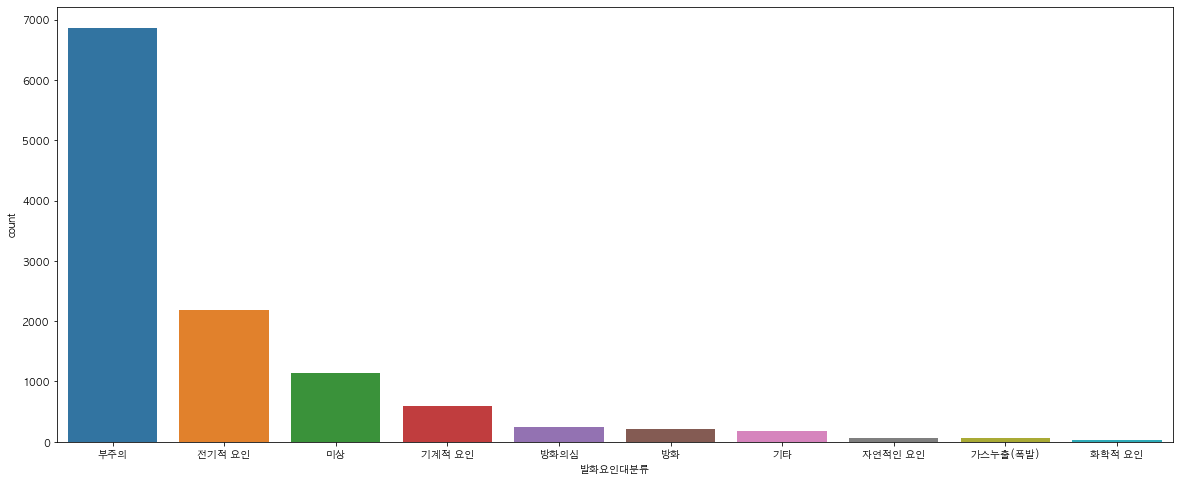

In [602]:
plt.figure(figsize=(20,8))
sns.countplot(data[data['장소대분류']=='주거']['발화요인대분류'],order=sort_home_column)